<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Introduction to Seaborn</p><br>

**_Seaborn_** is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

Here is some of the functionality that seaborn offers:

> * A dataset-oriented API for examining relationships between multiple variables
* Specialized support for using categorical variables to show observations or aggregate statistics
* Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data
* Automatic estimation and plotting of linear regression models for different kinds dependent variables
* Convenient views onto the overall structure of complex datasets
* High-level abstractions for structuring multi-plot grids that let you easily build complex visualizations
* Concise control over matplotlib figure styling with several built-in themes
* Tools for choosing color palettes that faithfully reveal patterns in your data

Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

**Additional Recommended Resources:**
* `seaborn` Documentation: https://seaborn.pydata.org/introduction.html

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Case : Cars Data

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original". 

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


Attribute Information:

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete (1: American, 2: European 3: Japanese)
9. car name: string (unique for each instance)

More info: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

## Read the data

Read the data from the url source (fixed-width formatted lines)

In [4]:
autos_df = pd.read_csv('./data/autos_df.csv',
                       index_col=['car_name'])
autos_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car_name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 28.0+ KB


## Describe the features

Get the mean, median, mode etc

In [6]:
autos_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


> horsepower seems to have missing values

In [7]:
autos_df["horsepower"].isnull().values.any()
autos_df[autos_df.horsepower.isnull()]

True

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car_name,,,,,,,,
ford pinto,25.0,4,98.0,NaN,2046.0,19.0,71,1
ford maverick,21.0,6,200.0,NaN,2875.0,17.0,74,1
renault lecar deluxe,40.9,4,85.0,NaN,1835.0,17.3,80,2
ford mustang cobra,23.6,4,140.0,NaN,2905.0,14.3,80,1
renault 18i,34.5,4,100.0,NaN,2320.0,15.8,81,2
amc concord dl,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [8]:
autos_df = autos_df.dropna()

Position (L) = (K/100)*100

where K is the percentile.

In [9]:
autos_df[["mpg", "displacement","horsepower","weight","acceleration"]].describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


> What is the average miles per gallon for car with different origin

In [10]:
autos_df.groupby('origin')['mpg'].mean()

origin
1    20.033469
2    27.602941
3    30.450633
Name: mpg, dtype: float64

## Plot

Using seaborn for different plots. Note that seaborn is built upon matplotlib. Some of the paramters passed inside the seaborn package is inherited from matplotlib

`%matplotlib inline` is a directive to the ipython notebook to render the plots here.

### Distribution Plot

#### Histogram plot

Histogram is a tool to visualize one dimensional data which is continous in nature. Given a collection of single random variables:

> * Choose a interval (bins in which the entire dataset can be bucketed)
* Count the data points within each bin (the y axis represents the frequency count)

seaborn package has `distplot` function

> Analyse the impact by changing the `kde` and `hist` parameter of the `distplot` function. The parameter `rug` makes a small vertical tick at each of the observation.

> Plot the distribution of miles per gallon for cars with American origin and Japanese origin

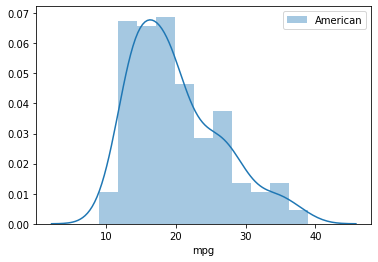

In [11]:
sn.distplot(autos_df[autos_df.origin == 1]['mpg'], label = 'American')
plt.legend()

In [ ]:
sn.distplot(autos_df[autos_df.origin == 3]['mpg'],label = 'Japenese',hist=False)
plt.legend()

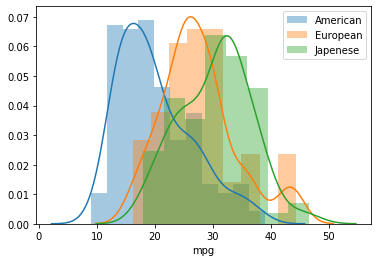

In [12]:
sn.distplot(autos_df[autos_df.origin == 1]['mpg'],label = 'American', hist=True)
sn.distplot(autos_df[autos_df.origin == 2]['mpg'], label = 'European',hist = True)
sn.distplot(autos_df[autos_df.origin == 3]['mpg'], label = 'Japenese',hist = True)
plt.legend()

In [ ]:
sn.distplot(autos_df['mpg'],hist = False)

#### Exercise

> Plot the distribution of horsepower for cars with American origin and Japanese origin

#### Kde Plot

Kernel density estimation(KDE) plot — plots a smooth curve shape of the distribution. It is a nonparametric estimation of density where inferences about the population is made from the finite data sample.

`Parametric Data/Test`: When the data is assumed to have been drawn from a particular distribution and some parametric test can be applied to it

`Non-Parametric Data/Test`: When we have no knowledge about the population and the underlying distribution

**What is a Kernal?**

Kernal: A kernel is a special type of probability density function (PDF) with the added property that it must be even.  Thus, a kernel is a function with the following properties

> * non-negative
* real-valued
* even
* its definite integral over its support set must equal to 1

Some common PDFs are kernels; they include the **Uniform(-1,1)** and **standard normal distributions**.


**What is Kernal density estimation?**

**`Kernel density estimation`** is a non-parametric method of estimating the probability density function (PDF) of a continuous random variable.  It is non-parametric because it does not assume any underlying distribution for the variable.  Essentially, at every datum, a kernel function is created with the datum at its centre – this ensures that the kernel is symmetric about the datum.  The PDF is then estimated by adding all of these kernel functions and dividing by the number of data to ensure that it satisfies the 2 properties of a PDF:

> * Every possible value of the PDF (i.e. the function, f(x)), is non-negative.
* The definite integral of the PDF over its support set equals to 1.

Steps in estimating kernal density:

> * Each observation is first replaced with a normal (Gaussian) curve centered at that value.
> * These curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1

More about KDE at: 
> * https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/
> * https://seaborn.pydata.org/tutorial/distributions.html



> Comparing mpg distributions of cars by different origins

In [ ]:
sn.distplot(autos_df[autos_df.origin == 1]['mpg'],hist=False, label = 'American')
sn.distplot(autos_df[autos_df.origin == 2]['mpg'], hist = False, label = 'European')
sn.distplot(autos_df[autos_df.origin == 3]['mpg'], hist = False, label = 'Japenese')

### Bar plot

Seaborn package has `barplot` function

look at the help for ?sn.barplot

`barplot` function has an estimator paramter which will anyways estimate the average value of a numeric feature for each categorical feature.

> Plot average miles per gallon for different cylinder types using autos_df dataframe

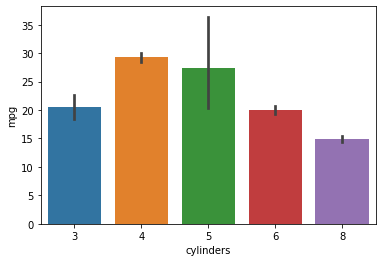

In [13]:
sn.barplot(y = 'mpg',
           x = 'cylinders',
           data = autos_df,
          )

#### Exercise

> Plot average miles per gallon for different cylinder types using pandas and seaborn

1. Use groupby method to group by `cylinders` and calulcate mean of mpg. Name this dataframe as `mpg_cylinder_df`. You will have to reset the index of the dataframe (`mpg_cylinder_df`) using `reset_index()`
2. call barplot from seaborn to plot `mpg_cylinder_df`.

What difference do you observe between this plot and the one above?

> Draw the barplot for average miles per gallon grouped by cylinder and origin using the `autos_df`

`barplot` function has an estimator paramter which will anyways estimate the average value of a numeric feature for each categorical feature.

In [ ]:
sn.barplot(x = 'cylinders',
           y = 'mpg',
           hue = 'origin',
           data = autos_df)

> The above plot seems to suggest that there is no car manufactured by american or european companies with 3 cylinders. Check the fact using `groupby` function on `autos_df`

In [ ]:
autos_df.groupby(['origin','cylinders'])['cylinders'].count()

#### Exercise

> Draw the barplot for average miles per gallon grouped by cylinder and origin using pandas and seaborn

1. Use groupby method to group by `cylinders`, `origin` and calulcate mean of mpg. Name this dataframe as `mpg_cylinders_origin_df`. You will have to reset the index of the dataframe (`mpg_cylinders_origin_df`) using `reset_index()`
2. call barplot from seaborn to plot `mpg_cylinders_origin_df`.

What difference do you observe between this plot and the one above?

### Trend plot

Use the `factorplot` function of seaborn package

Get help on ?sn.factorplot

> * Vary the kind parameter( The kind of plot to draw) to understand different plots : {``point``, ``bar``, ``count``, ``box``, ``violin``, ``strip``}
* Vary the size = 4, aspect = 1 paramter to see the impact


> Plot the trend of average miles per gallon by year for different origins

In [ ]:
sn.factorplot(x = 'model_year',
              y = 'mpg',
              hue = 'origin',
              data = autos_df
             )


#### Exercise

> Plot the trend of average miles per gallon by year for different origins (by using `groupby` function followed by `factorplot`. 

1. Use groupby method to group by `model_year`, `origin` and calulcate mean of mpg. Name this dataframe as `mpg_year_origin_df`. You will have to reset the index of the dataframe (`mpg_year_origin_df`) using `reset_index()`
2. call barplot from seaborn to plot `mpg_year_origin_df`.

What difference do you observe between this plot and the one above?

In [ ]:
# your code here to group

In [ ]:
# your code here for plot

### Box Plot

A boxplot is a graph that gives you a good indication of how the values in the data are spread out.

To generate a box plot:Assume data as : 98, 77, 85, 88, 82, 83, 87, 67, 100, 63, 105

> * Arrange data in ascending order: 63, 67, 77, 82, 83, 85, 87, 88, 98, 100, 105
> * Calculate the median (middle value of the data, 85). This is Q2
> * Calculate the median of the first half of the data, 77). This is Q1.
> * Calculate the median of the second half of the data, 98). This is Q3.
> * The box joins Q1 to Q3 (contains middle 50% of data).
> * IQR = Q3 - Q1 = 11 
> * LIF = Q1 - 1.5*IQR = 60.5 ; UIF = Q3 + 1.5 IQR = 114.5
> * The point adjancent to LIF is 67 and point adjancent to UIF is 105.
> * The smallest observation greater than or equal to `LIF`  builds lower whisker.
> * The largest observation less than or equal to `UIF` builds upper whisker.

> Point outside the fences are outliers.

Intrepret boxplot:
> * If wide box and long whiskers, then maybe the data doesn't cluster.
> * If box is small and the whiskers are short, then probably your data does indeed
cluster
> * If box is small and the whiskers are long, then maybe the data clusters, but have
some "outliers"

Use `boxplot` function from the seaborn package.

Get a help ?sn.boxplot

> Box plot of miles per gallon for all cars

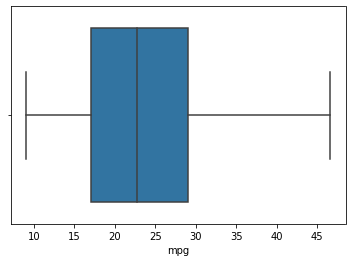

In [14]:
sn.boxplot(autos_df.mpg)

> Box plot of miles per gallon for different number of cylinders

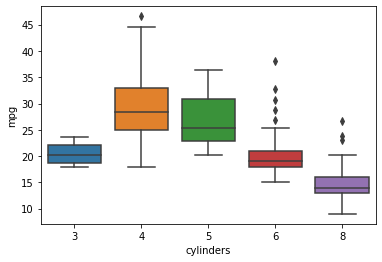

In [15]:
sn.boxplot(x = 'cylinders',
           y = 'mpg',
           data = autos_df
          )

#### Exercise

> Draw box plot of miles per gallon for different number of cylinders using `factorplot` or `catplot`

What inference can be drawn based on the above plot?

#### Identify outliers - Manual

> Find the outlier points in six cylinder cars

In [ ]:
Q3 = autos_df[autos_df.cylinders == 6].mpg.quantile( 0.75 )
Q3
Q1 = autos_df[autos_df.cylinders == 6].mpg.quantile( 0.25 )
Q1
IQR = Q3-Q1
print(IQR)

Outlier = Q3 + 1.5*IQR

print (Outlier)

> The cars which are outliers are (as reported by manual computation):

In [ ]:
autos_6_cyl_df = autos_df[autos_df.cylinders == 6]

autos_6_cyl_df[ autos_6_cyl_df.mpg > Outlier]

#### Identify outliers - Scipy package

In [ ]:
import scipy.stats as sts
iqr = sts.iqr( autos_df[autos_df.cylinders == 6].mpg )
iqr
outlier = autos_df[autos_df.cylinders == 6].mpg.quantile( 0.75 ) + \
1.5 * sts.iqr( autos_df[autos_df.cylinders == 6].mpg )
outlier

> The cars which are outliers are (as reported by scipy package):

In [ ]:
autos_6_cyl_df = autos_df[autos_df.cylinders == 6]

autos_6_cyl_df[ autos_6_cyl_df.mpg > Outlier]

#### Exercise

> Draw boxplot of miles per gallon for different number of cylinders by different origins. Use `hue = 'origin'`

#### Exercise

> Draw boxplot of horsepower for different number of cylinders by different origins. Use `hue = 'origin'`

### Scatter plot

Scatter plot is a cloud of points showing a joint distribution of two numerical variables where each point represents an observation from the dataset. Helps to understand the relationship between two numerical variables. It gives an indication of movement of one continous variable w.r.t another continous variable. 

`lmplot` function from seaborn package can be used for scatter plot. 

Help on ?sn.lmplot

> Plot between weight and miles per gallon of different cars. What inference can be drawn from it?

In [ ]:
sn.lmplot(data = autos_df,
          x = 'weight',
          y = 'mpg',
          fit_reg = False);

> Plot between weight and miles per gallon of different cars by their origin. What inference can be drawn from it?

In [ ]:
sn.lmplot(data = autos_df,
          x = 'weight',
          y = 'mpg',
          hue = 'origin',
          fit_reg = False);

### Pairplot

Plot pairwise relationships in a dataset. The `pairplot` function can be used for the plot.

Help on ?sn.pairplot

> Plot between 'mpg', 'displacement','horsepower','acceleration','weight'

In [ ]:
auto_clean_df = autos_df[['mpg',
                          'displacement',
                          'horsepower',
                          'acceleration',
                          'weight']].dropna()

In [ ]:
sn.pairplot(auto_clean_df)

### Heatmap

Plot rectangular data as a color-encoded matrix. A rectangular dataset is a 2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.

Help on ?sn.heatmap

> Plot the correlation between 'mpg', 'displacement','horsepower','acceleration','weight'

In [ ]:
auto_clean_df.corr()

In [ ]:
sn.heatmap(auto_clean_df.corr(),
           annot = True,
           cmap = sn.diverging_palette(250, 10, n = 25))

### Jointplot

Draw a plot of two variables with bivariate and univariate graphs. Jointplot can be used to show joint distribution between different variables along with the associated marginal distributions.

`jointplot` also calculates a Pearson correlation coefficient (measures the linear relationship between two variables) and the p-value for testing non-correlation.

Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed, and not necessarily zero-mean. 
> * Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation.
* Correlations of -1 or +1 imply an exact linear relationship. 
* Positive correlations imply that as x increases, so does y. 
* Negative correlations imply that as x increases, y decreases.

More on corelation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
#### scatter



Scatter plot is a cloud of points showing a joint distribution of two numerical variables where each point represents an observation from the dataset. Helps to understand the relationship between two numerical variables

Help on ?sn.jointplot

> Scatter plot mpg and weight of the cars

In [ ]:
sn.jointplot(x = 'mpg',
             y = 'weight',
             data = autos_df, color = 'g',
             kind = 'scatter'
            )

The problem with scatter plot in over plotting. When dataset is huge, dots of the scatterplot tend to overlap, and  graphic becomes unreadable and meanigless.

#### hex


In one dimension straight line segments are the only possible shape for bin in a histogram. However for data in two dimensions bins can be more general shape (rectangular/Hexagon):

> * The obvious strategy is to choose a rectangular bin to build a histogram. Imagine the above scatter plot being filled with rectangular boxes (where the boxes represents the bins in horizontal and vertical direction). The count of values in each of the bins can be colored with gradient fill.
* The hexagon tiling uses a hexagon shape for binning. The same scatterplot chart can be filled with hexagon shapes and the count of points falling in each hexagon can be used to fill the shape

> Hex plot mpg and weight of the cars

In [ ]:
sn.jointplot(x = 'mpg',
             y = 'weight',
             data = autos_df, color = 'k',
             kind = 'hex'
            )

### Additional plots 

KDE plot and Violin Plot. For your read as home assignment.

#### kde

Kernel density estimation(KDE) plot — plots a smooth curve shape of the distribution. It is a nonparametric estimation of density where inferences about the population is made from the finite data sample.

In a bivariate data, contour plot is used to represent the joint probability distribution in `jointplot`

> A circle in a contour plot represents a set of (x,y) values for which the probability density values which were computed was same.

More about KDE at: http://alanpryorjr.com/visualizations/seaborn/jointplot/jointplot/

> Plot a kde chart on mpg and weight of the cars

In [ ]:
g = sn.jointplot(x = 'mpg',
             y = 'weight',
             data = autos_df, color = 'r',
             kind = 'kde'
               )
g.ax_joint.collections[0].set_alpha(0)
#g.ax_joint.clabel(plt.contour())

> `jointplot` of miles per gallon vs. weight with an overlap of `scatter` and `kde`

In [ ]:
g = sn.jointplot(x = 'mpg',
             y = 'weight',
             data = autos_df, 
             color = 'r',
             kind = 'kde'
            )
g.plot_joint(plt.scatter, c="grey", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)

#### Plot a discrete and continuous variable using kde

1. Plot a kde on mpg and origin of the cars
2. Plot a kde on cylinders and acceleration of the cars

The kde shows the density of a continuous feature for each value of the target. There are usually 2 or 3 colored humps representing the 2 or 3 values of target. 
> * If the humps are well-separated and non-overlapping, then there is a correlation with the TARGET. 
* If the humps are overlapping a lot, then that means the feature is not well-correlated with the TARGET, because the TARGET is equally as common on those values of the feature.

Pearson corelation does not make meaning with discrete and continuous variable.

In [ ]:
sn.jointplot(x = 'mpg',
             y = 'origin',
             data = autos_df, color = 'r', stat_func=None,
             kind = 'kde'
            )

### Kdeplot
To show the bivariate density more continuously increase the number of contour levels.

Help on ?sn.kdeplot

In [ ]:
cmap = sn.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

b = sn.kdeplot(autos_df.mpg,
           autos_df.origin, 
           cmap=cmap, 
           n_levels=30,
           shade=True, cbar=True
          )

### Violinplot
Violin plot — combines KDE with box plots. In the interior of the violin we can show the individual observation or summary of the distribution. 

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

> Plot miles per gallon for cars with different origin

In [ ]:
sn.violinplot(x='origin',
              y = 'mpg',
              data = autos_df
             )

## Thank you